# Programming for Data Science - CA2 - AY 23/24
<table align="center">
    <thead>
    <tr><td>Category</td><td>Value</td></tr>
    </thead>
    <tbody>
        <tr><td>Name</td><td>M.Rajkaran</td></tr>
        <tr><td>Admin</td><td>2109039</td></tr>
        <tr><td>Class</td><td>DIT/FT/2A/02</td></tr>
        <tr><td>Elective Class</td><td>EL/EP0302/FT/03</td></tr>
    </tbody>
</table>

## Datasets Used


<table align=center>
    <thead><tr><td><strong>Dataset Name</strong></td><td><strong>Description</strong></td><td><strong>Link</strong></tr></td></thead>
    <tbody>
        <tr><td>Graduate Employment Survey - NTU, NUS, SIT, SMU, SUSS & SUTD</td><td>The starting salary and employment rate across different universities and degrees in Singapore.</td><td><a src="https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd">data.gov.sg</a></td></tr>
        <tr><td>Universities - Intake, Enrolment and Graduates by Course</td><td>The intake number of intake,enrolment and graduates across different courses in Singapore</td><td><a src="https://beta.data.gov.sg/datasets/443/view">data.gov.sg</a></td></tr>
        <tr><td>Government Recurrent Expenditure on Education Per Student</td><td>The government expenditure on educational institutions over the years</td><td><a src="https://beta.data.gov.sg/datasets/414/view">data.gov.sg</a></td></tr>
        <tr><td>World Happiness Report</td><td>Happiness levels of countries around the world.</td><td><a src="https://www.kaggle.com/datasets/unsdsn/world-happiness">kaggle.com</a></td></tr>
        <tr><td>Countries by IQ - Average IQ by Country 2023</td><td>The average IQ across different countries in 2023.</td><td><a src="https://worldpopulationreview.com/country-rankings/average-iq-by-country">worldpopulationreview.com</a></td></tr>
    </tbody>
</table>

## Importing necessary packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Reading Data

In [26]:
graduate_employment_survey = pd.read_csv("./Datasets/Graduate Employment Survey/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv", encoding='latin1')
average_iq = pd.read_csv("./Datasets/Average IQ by Country 2023/average-iq-by-country-2023.csv")
government_expenditure =  pd.read_csv("./Datasets/Government Expenditure/GovernmentRecurrentExpenditureonEducationPerStudent.csv")
uni_intake = pd.read_csv("./Datasets/University Intake/UniversitiesIntakeEnrolmentandGraduatesbyCourse.csv")
world_happiness_2021 = pd.read_csv("./Datasets/World Happiness Report/2021.csv")

### Function to describe datasets

In [27]:
def text_analysis(dataset):
    print(f"First few rows of this dataset:\n{tabulate(dataset.head())}")
    print(f"\n\nThe shape of this dataset is:\n{dataset.shape}")
    print(f"\n\nColumns of this dataset:\n{dataset.columns}")
    print(f"\n\nDatatypes in this dataset:\n{dataset.dtypes}")


### Text Analysis of Graduate Employment Survey

#### Cleaning the dataset

Removing unwanted columns

In [28]:
graduate_employment_survey = graduate_employment_survey.drop(columns=['basic_monthly_median','gross_monthly_median','gross_mthly_25_percentile','gross_mthly_75_percentile'])
graduate_employment_survey.replace('na', float('nan'), inplace=True)
graduate_employment_survey.dropna(inplace=True)

In [29]:
text_analysis(graduate_employment_survey)

First few rows of this dataset:
-  ----  --------------------------------  ---------------------------------------------  -------------------------------------------  ----  ----  ----  ----
0  2013  Nanyang Technological University  College of Business (Nanyang Business School)  Accountancy and Business                     97.4  96.1  3701  3727
1  2013  Nanyang Technological University  College of Business (Nanyang Business School)  Accountancy (3-yr direct Honours Programme)  97.1  95.7  2850  2938
2  2013  Nanyang Technological University  College of Business (Nanyang Business School)  Business (3-yr direct Honours Programme)     90.9  85.7  3053  3214
3  2013  Nanyang Technological University  College of Business (Nanyang Business School)  Business and Computing                       87.5  87.5  3557  3615
4  2013  Nanyang Technological University  College of Engineering                         Aerospace Engineering                        95.3  95.3  3494  3536
-  ----  -----------

### Text Analysis of Government Recurrent Expenditure on Education Per Student

In [30]:
text_analysis(government_expenditure)

First few rows of this dataset:
-  ----  --------------------------------------  ----
0  1986  Primary Schools                         1404
1  1986  Secondary Schools                       1931
2  1986  Junior Colleges/Centralised Institutes  2606
3  1986  Polytechnics                            4143
4  1986  Institute of Technical Education        3924
-  ----  --------------------------------------  ----


The shape of this dataset is:
(216, 3)


Columns of this dataset:
Index(['year', 'type_of_educational_institution', 'expenditure_per_student'], dtype='object')


Datatypes in this dataset:
year                                int64
type_of_educational_institution    object
expenditure_per_student             int64
dtype: object


### Text Analysis of Universities - Intake, Enrolment and Graduates by Course

### Cleaning the dataset

Removing rows with sex 'F' as I am looking for the total intake, enrolment and graduates by each course regardless of gender.

In [31]:
uni_intake = uni_intake[uni_intake.sex != 'F']

As this dataset does not have data on the 'Education' course from years 2005 to 2010, I manipulated the dataset by getting the values from 2011, and subtracting 50 for each year. This was a rough estimate.

In [32]:
uni_intake_2011 = uni_intake[(uni_intake.year == 2011) &(uni_intake.course == 'Education')]

intake_2011 = uni_intake_2011.intake.copy()
enrolment_2011 = uni_intake_2011.enrolment.copy()
graduates_2011 = uni_intake_2011.graduates.copy()
years_array = [2010,2009,2008,2007,2006,2005]
for year in years_array:

    intake_2011 -= 50
    enrolment_2011 -= 50
    graduates_2011 -= 50

    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'intake'] = float(intake_2011)
    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'enrolment'] = float(enrolment_2011)
    uni_intake.loc[(uni_intake.year == year) & (uni_intake.course == 'Education'), 'graduates'] = float(graduates_2011)

In [33]:
text_analysis(uni_intake)

First few rows of this dataset:
-  ----  --  ------------------------------------  ----  ----  ----
0  2005  MF  Accountancy                            876  2561   706
2  2005  MF  Architecture, Building & Real Estate   299  1310   180
4  2005  MF  Business & Administration             1545  5013  1256
6  2005  MF  Dentistry                               33   139    34
8  2005  MF  Education                               97  1452   106
-  ----  --  ------------------------------------  ----  ----  ----


The shape of this dataset is:
(255, 6)


Columns of this dataset:
Index(['year', 'sex', 'course', 'intake', 'enrolment', 'graduates'], dtype='object')


Datatypes in this dataset:
year          int64
sex          object
course       object
intake        int64
enrolment     int64
graduates     int64
dtype: object


### Text Analysis of Average IQ by Country 2023

#### Cleaning the dataset

Removing unwanted columns like 'pop2023'

In [34]:
average_iq = average_iq.drop(columns=['pop2023'])

In [35]:
text_analysis(average_iq)

First few rows of this dataset:
-  -  ---------  ------
0  1  Japan      106.48
1  2  Taiwan     106.47
2  3  Singapore  105.89
3  4  Hong Kong  105.37
4  5  China      104.1
-  -  ---------  ------


The shape of this dataset is:
(199, 3)


Columns of this dataset:
Index(['rank', 'country', 'iq'], dtype='object')


Datatypes in this dataset:
rank         int64
country     object
iq         float64
dtype: object


### Text Analysis of World Happiness Report

In [36]:
def removeUnwanted(dataset):
    dataset = dataset.drop(columns=['Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'])
    return dataset

#### 2021

In [37]:
world_happiness_2021 = removeUnwanted(world_happiness_2021)

In [38]:
text_analysis(world_happiness_2021)

First few rows of this dataset:
-  -----------  --------------  -----  -----  -----  -----  ------  -----  ----  -----  ------  -----
0  Finland      Western Europe  7.842  0.032  7.904  7.78   10.775  0.954  72    0.949  -0.098  0.186
1  Denmark      Western Europe  7.62   0.035  7.687  7.552  10.933  0.954  72.7  0.946   0.03   0.179
2  Switzerland  Western Europe  7.571  0.036  7.643  7.5    11.117  0.942  74.4  0.919   0.025  0.292
3  Iceland      Western Europe  7.554  0.059  7.67   7.438  10.878  0.983  73    0.955   0.16   0.673
4  Netherlands  Western Europe  7.464  0.027  7.518  7.41   10.932  0.942  72.4  0.913   0.175  0.338
-  -----------  --------------  -----  -----  -----  -----  ------  -----  ----  -----  ------  -----


The shape of this dataset is:
(149, 12)


Columns of this dataset:
Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', '

## Title of data analysis

### Connecting the Dots: Education, Employment, Salary Trends in Singapore, and Their Impact on Happiness Score and Average IQ

#### Questions to Answer

<ul>
    <strong>Average IQ and World Happiness</strong>
    <li>What are the countries with the highest IQ?</li>
    <li>Is there a relationship between IQ and happiness score?</li>
    <br>
    <strong>Government Expenditure on Education per Student</strong>
    <li>What is the government's expenditure per student in tertiary educational institutions over the years?</li>
    <br>
    <strong>Graduate Employment Survery and Universities Intake, Enrolment and Graduates</strong>
    <li>Which Singaporean local university offers the highest average monthly salary? How has this salary trend evolved over time for that particular university?</li>
    <li>Which specific school within Singapore Management University (SMU) boasts the highest average salary? How does the salary differ between the Regular program and the Cum Laude program offered by that school?</li>
    <li>What is the trend in the number of students enrolled, intake, and graduates for the Law and Information Technology courses over the years?</li>
    <li>What are the disparities in employment rates and average monthly salaries between the Law and Information Systems courses at Singapore Management University (SMU)?</li>
    <li>How do the basic monthly salaries for law graduates from NUS and SMU compare?</li>
</ul>

## What are the countries with the highest IQ?

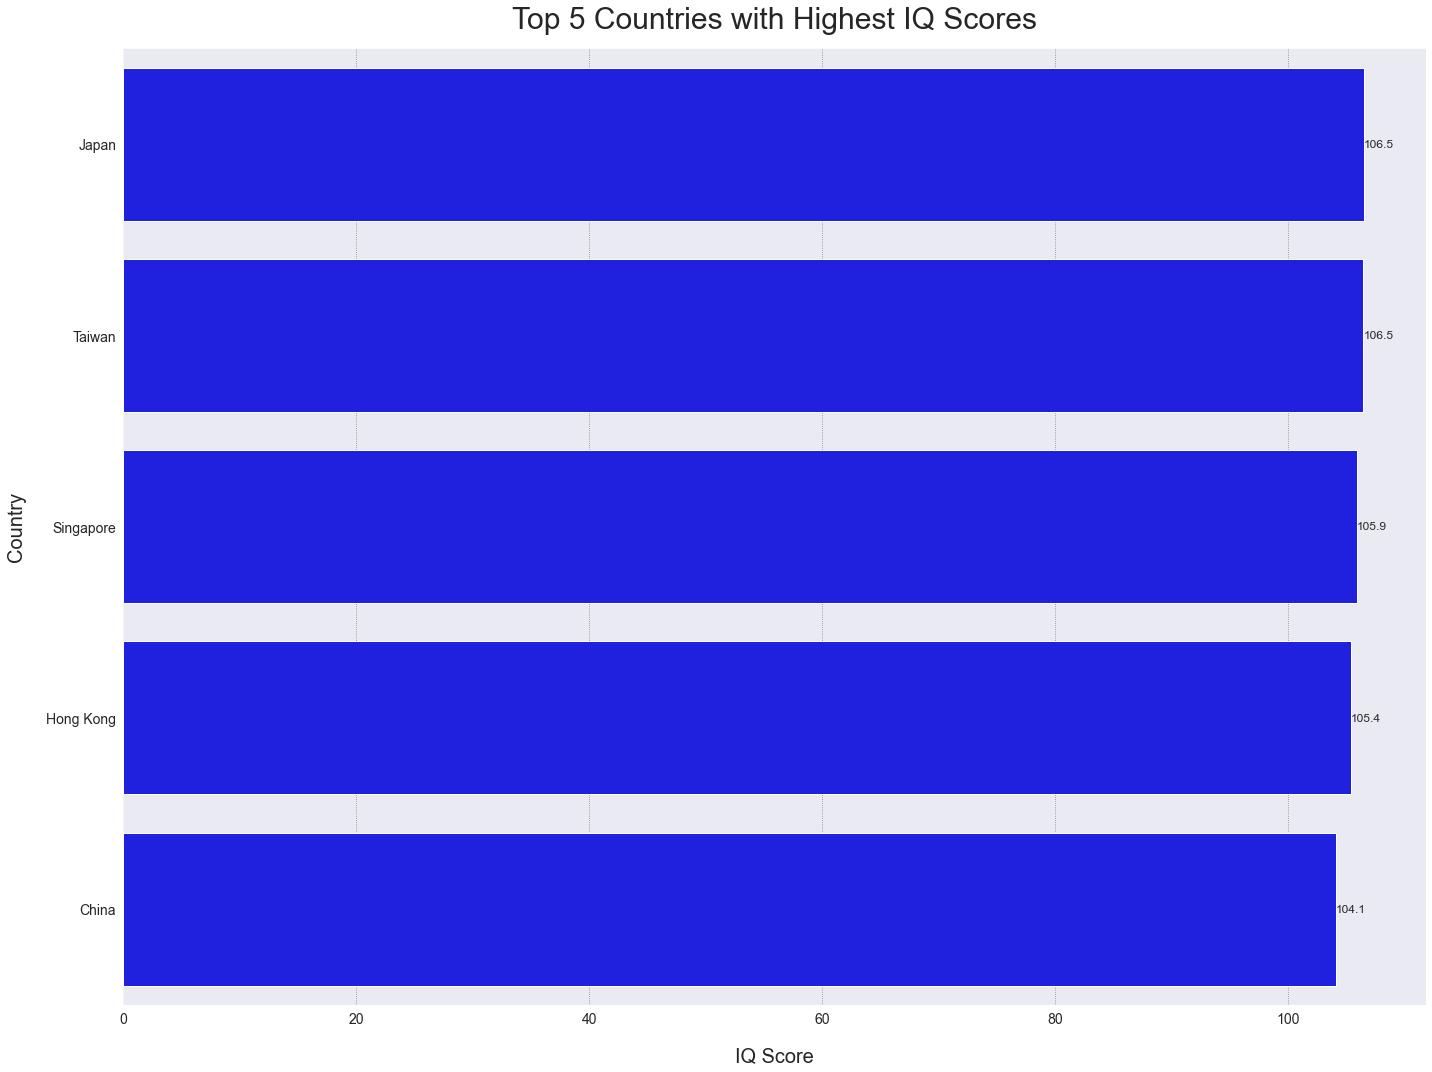

In [39]:
sort_iq = average_iq.sort_values(by='iq', ascending=False)
top_5 = sort_iq.head(5)

plt.figure(figsize=(20, 15))
sns.set_style("darkgrid", {"grid.color": ".3", "grid.linestyle": ":"})
sns.barplot(x='iq', y='country', data=top_5, color='blue')

plt.xlabel('IQ Score', fontsize=20, labelpad=20)
plt.ylabel('Country', fontsize=20, labelpad=20)
plt.title('Top 5 Countries with Highest IQ Scores', fontsize=30, pad=20)
plt.grid(axis='x', linestyle='dotted', alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for index, value in enumerate(top_5['iq']):
    plt.text(value, index, f'{value:.1f}', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

According to the bar chart, Japan (106.5), Taiwan (106.5), Singapore (105.9), Hong Kong (105.4), and China (104.1) are the countries with the highest IQ scores in the world. Notably, all these countries are situated in Asia. There are several potential reasons for the high IQ scores observed in East Asia. One significant factor is the strong emphasis on education in these nations, which has contributed to their higher average IQs. Additionally, the absence of significant political or social instability in these countries may also play a role in fostering intellectual development. Moreover, in Asian cultures, parents commonly prioritize their children's education, which further contributes to their academic achievements. (<a src="https://edition.cnn.com/2015/10/05/asia/singapore-smartest-kids/index.html">Source</a>)

Singapore, in particular, boasts a highly developed education system that places a focus on critical thinking and problem-solving skills. The educational environment in Singapore encourages children to actively learn and develop their intellectual abilities. Moreover, the country's competitive culture fosters a drive among students to excel in their studies. This positive learning environment and the emphasis on hard work allow students in Singapore to perform at their best academically. (<a src="https://govisafree.com/countries-with-the-highest-iq/#:~:text=Students%20are%20encouraged%20to%20develop,knows%20how%20to%20have%20fun.">Source</a>)

## Is there a relationship between IQ and happiness score?

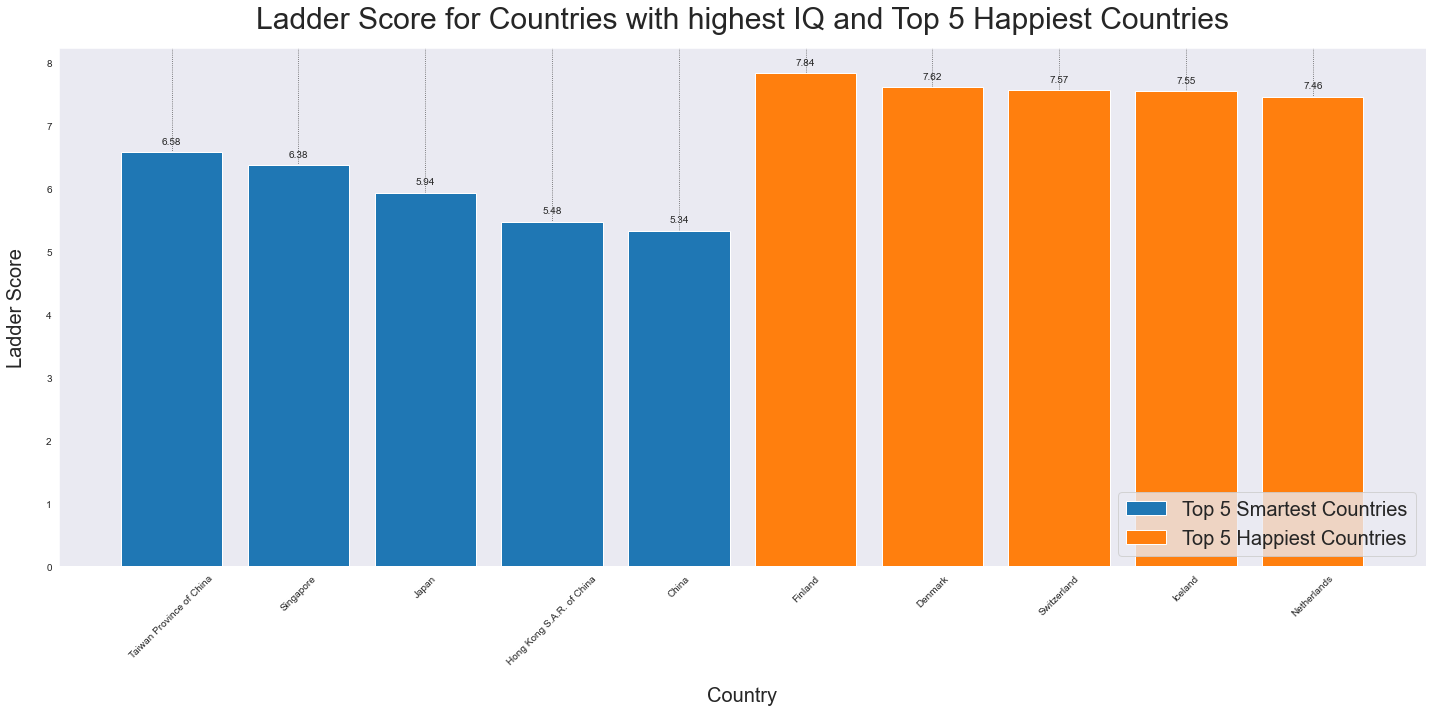

In [40]:
top_iq_countries = ["Japan", "Taiwan Province of China", "Singapore", "Hong Kong S.A.R. of China", "China"]
selected_countries = world_happiness_2021[world_happiness_2021["Country name"].isin(top_iq_countries)]

happiest_countries = world_happiness_2021.sort_values(by="Ladder score", ascending=False)
happiest_countries = happiest_countries.head(5)

plt.figure(figsize=(20, 10))

plt.bar(selected_countries["Country name"], selected_countries["Ladder score"], label='Top 5 Smartest Countries')

plt.bar(happiest_countries["Country name"], happiest_countries["Ladder score"], label='Top 5 Happiest Countries')

for i, value in enumerate(selected_countries["Ladder score"]):
    plt.text(i, value + 0.1, str(round(value, 2)), ha='center', va='bottom')

for i, value in enumerate(happiest_countries["Ladder score"]):
    plt.text(i + len(selected_countries), value + 0.1, str(round(value, 2)), ha='center', va='bottom')

plt.xlabel('Country',fontsize=20,labelpad=20)
plt.ylabel('Ladder Score',fontsize=20,labelpad=20)
plt.title('Ladder Score for Countries with highest IQ and Top 5 Happiest Countries',fontsize=30,pad=20)
plt.xticks(rotation=45)
plt.legend(loc='lower right',fontsize=20)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

The bar graph presents the ladder score, a measure of life satisfaction ranging from 0 to 10, with 10 indicating the highest satisfaction level. The graph categorizes the smartest countries in blue and the happiest countries in orange, revealing a weak positive correlation between IQ and happiness score. Notably, some of the world's smartest countries, like Singapore and Hong Kong, are not among the happiest, while some of the happiest countries, like Finland and Denmark, are not the smartest. This suggests that factors beyond IQ contribute to happiness, such as social support, healthy life expectancy, and personal freedom.

The graph demonstrates that the happiest countries predominantly lie in Europe. According to The Manual, European countries often provide better work-life balance perks, including paid leave, international health insurance, and numerous public holidays, which can contribute to the overall happiness of their citizens.

For instance, Japan, considered the smartest country, has a ladder score of 5.94, while Finland, which has the highest ladder score, achieves 7.84. Singapore, despite being one of the world's highest in GDP per capita, healthy life expectancy, and government integrity, has a relatively lower ladder score of 6.38. The city's high cost of living, especially in housing, food, and transportation, coupled with long working hours, can take a toll on the mental and physical health of Singaporeans. Additionally, the dense urban environment lacks sufficient public spaces for relaxation and socializing, further influencing the overall happiness of its residents. (<a src="https://www.propertysoul.com/2018/03/27/singapore-not-happiest-country/">Source</a>)

In conclusion, the data analysis highlights the complex relationship between IQ and happiness, indicating that various factors play a role in a country's overall life satisfaction. While IQ may influence certain aspects of happiness, social and cultural elements, work-life balance, and the availability of public spaces for recreation and social interaction significantly impact a nation's happiness.

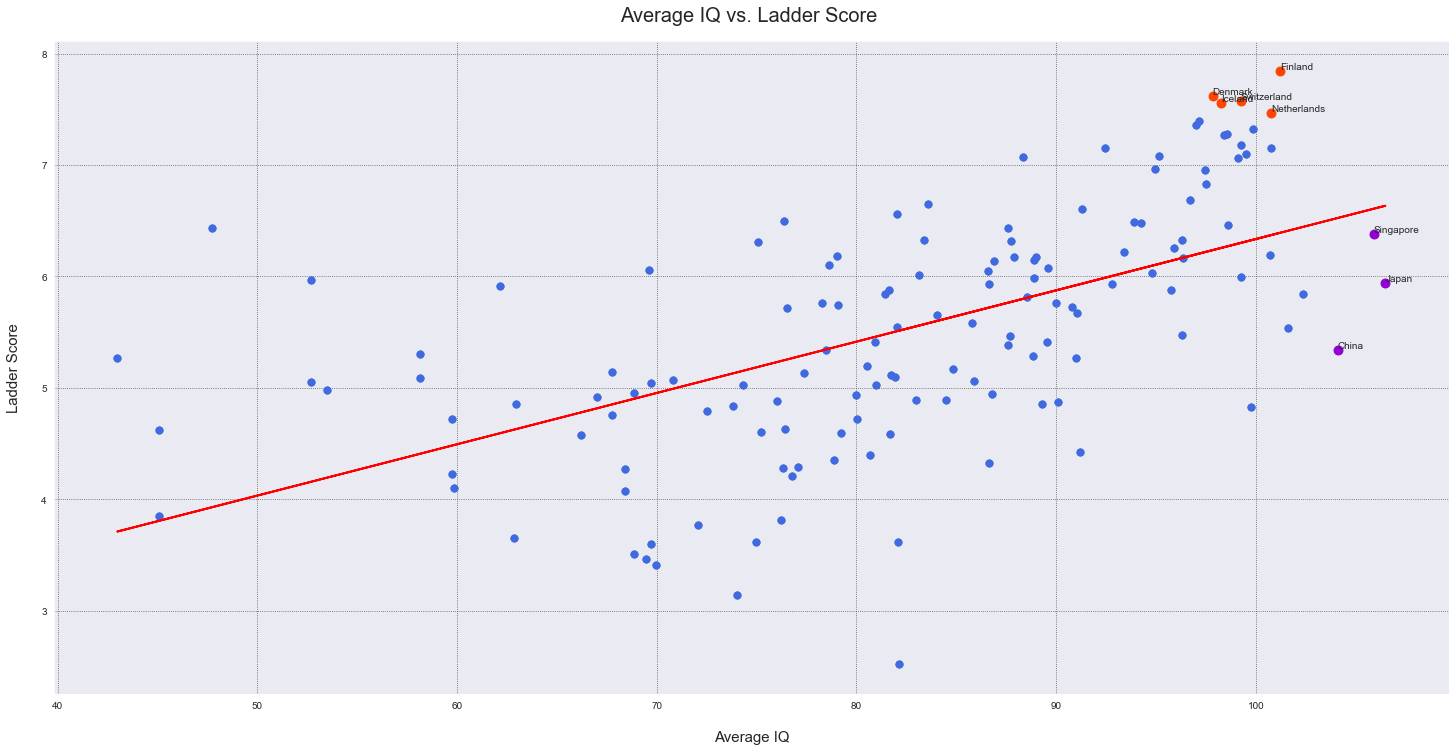

In [41]:
happiness_iq = pd.merge(world_happiness_2021, average_iq, left_on='Country name', right_on='country')

iq = happiness_iq.iq
ladder_score = happiness_iq['Ladder score']

plt.figure(figsize=(25, 12))

a, b = np.polyfit(iq, ladder_score, 1)
plt.scatter(iq,ladder_score, s=50, alpha=0.8)
plt.plot(iq, a*iq + b, color='red', linewidth=2)
plt.xlabel('Average IQ', fontsize=15,labelpad=20)
plt.ylabel('Ladder Score', fontsize=15,labelpad=20)
plt.title('Average IQ vs. Ladder Score ', fontsize=20,pad=20)

top_iq_countries = ["Japan", "Singapore", "China"]
for i, country in enumerate(happiness_iq['Country name']):
    if country in top_iq_countries:
        plt.text(happiness_iq['iq'][i], happiness_iq['Ladder score'][i], country, ha='left', va='bottom', fontsize=10)

happiest_countries = ["Finland","Denmark","Switzerland","Iceland","Netherlands"]
for i, country in enumerate(happiness_iq['Country name']):
    if country in happiest_countries:
        plt.text(happiness_iq['iq'][i], happiness_iq['Ladder score'][i], country, ha='left', va='bottom', fontsize=10)

for i, country in enumerate(happiness_iq['Country name']):
    color = 'royalblue'
    s=50 
    if country in top_iq_countries:
        color = 'darkviolet'
        s=80
    elif country in happiest_countries:
        color = 'orangered'
        s=80
    plt.scatter(happiness_iq['iq'][i], happiness_iq['Ladder score'][i], s=s, c=color)
plt.show()

This scatter plot presents a comparison between the ladder score, representing happiness, and the average IQ of various countries. While some may argue that intelligence directly influences happiness, evidence suggests that there are additional factors at play. In this analysis, we will explore how the relationship between IQ and happiness varies across different nations, challenging the notion that IQ alone determines a country's overall well-being.

According to a report by the BBC (source: <a src="https://www.bbc.com/news/health-19659985">BBC</a>), individuals with lower intelligence are often more prone to unhappiness when compared to their intellectually gifted counterparts. However, the scatter plot demonstrates that this association is not as straightforward as initially assumed.

Japan, renowned for having the highest average IQ, may not be the "smartest" country in terms of overall happiness. Surprisingly, Finland, despite having an IQ close to Japan's, emerges as the happiest country. This highlights that happiness is influenced by factors beyond just average IQ, indicating that other variables must contribute significantly. The correlation between IQ and happiness becomes less apparent when examining Asian countries like China, Singapore, and Japan. Although these nations boast high IQ scores, their happiness scores do not necessarily align (source: <a src="https://www.businessinsider.com/china-is-richer-but-not-happier-2013-11">Insider</a>). China, for instance, demonstrates a stark discrepancy between its economic prosperity and relatively low happiness scores. According to <a src="https://www.businessinsider.com/china-is-richer-but-not-happier-2013-11">Insider</a>, this could be attributed to environmental factors, such as excessive pollution in cities like Beijing, which adversely impact citizens' well-being. Singapore, on the other hand, stands out as the happiest country in Asia (source: <a src="chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://happiness-report.s3.amazonaws.com/2023/WHR+23.pdf">UN’s World Happiness Report 2023</a>). Despite having a slightly lower average IQ than Japan, Singapore ranks higher on the happiness scale. This indicates that factors like political stability, low crime rates, and excellent infrastructure, including healthcare, education, housing, recreation, and transport, significantly contribute to Singapore's overall happiness. In conclusion, the scatter plot comparing IQ and happiness across different countries suggests that while intelligence can have some influence on individual well-being, it is not the sole determinant of a country's happiness. Finland's high happiness score despite a comparable IQ to Japan challenges the direct link between intelligence and happiness. Moreover, factors like cultural pressure, environmental conditions, and access to essential services also play a significant role in shaping a nation's overall happiness. As societies become more complex, it is crucial to consider these diverse factors when understanding the happiness levels of different countries.

Let's focus on Singapore's education system.


### Takeaways from the average IQ and world happinesss datasets

<li>The data analysis of IQ and happiness scores reveals a weak positive correlation, suggesting that factors beyond IQ significantly contribute to a country's overall well-being and happiness.</li>
<li>Despite having high IQ scores, some of the world's smartest countries, such as Singapore and Hong Kong, are not among the happiest, while some of the happiest countries, like Finland and Denmark, are not the smartest.</li>
<li>The happiness of a nation is influenced by factors like social support, healthy life expectancy, freedom to make life choices, work-life balance, and access to essential services.</li>

About Singapore:

<li>Singapore has a highly developed education system that emphasizes critical thinking and problem-solving skills.</li>
<li>The educational environment in Singapore encourages active learning and intellectual development among students.</li>
<li>The country's competitive culture motivates students to excel academically.</li>

Singapore's education system plays a role in producing high IQ scores, but it may not be the sole factor determining the country's overall happiness.</li>
Overall, the data analysis highlights the multifaceted nature of happiness, emphasizing the importance of considering various factors when understanding the well-being and satisfaction levels of different countries. Singapore's education system, while contributing to high IQ scores, is just one aspect of the broader factors that influence happiness in the nation.

## What is the government's expenditure per student in tertiary educational institutions over the years?

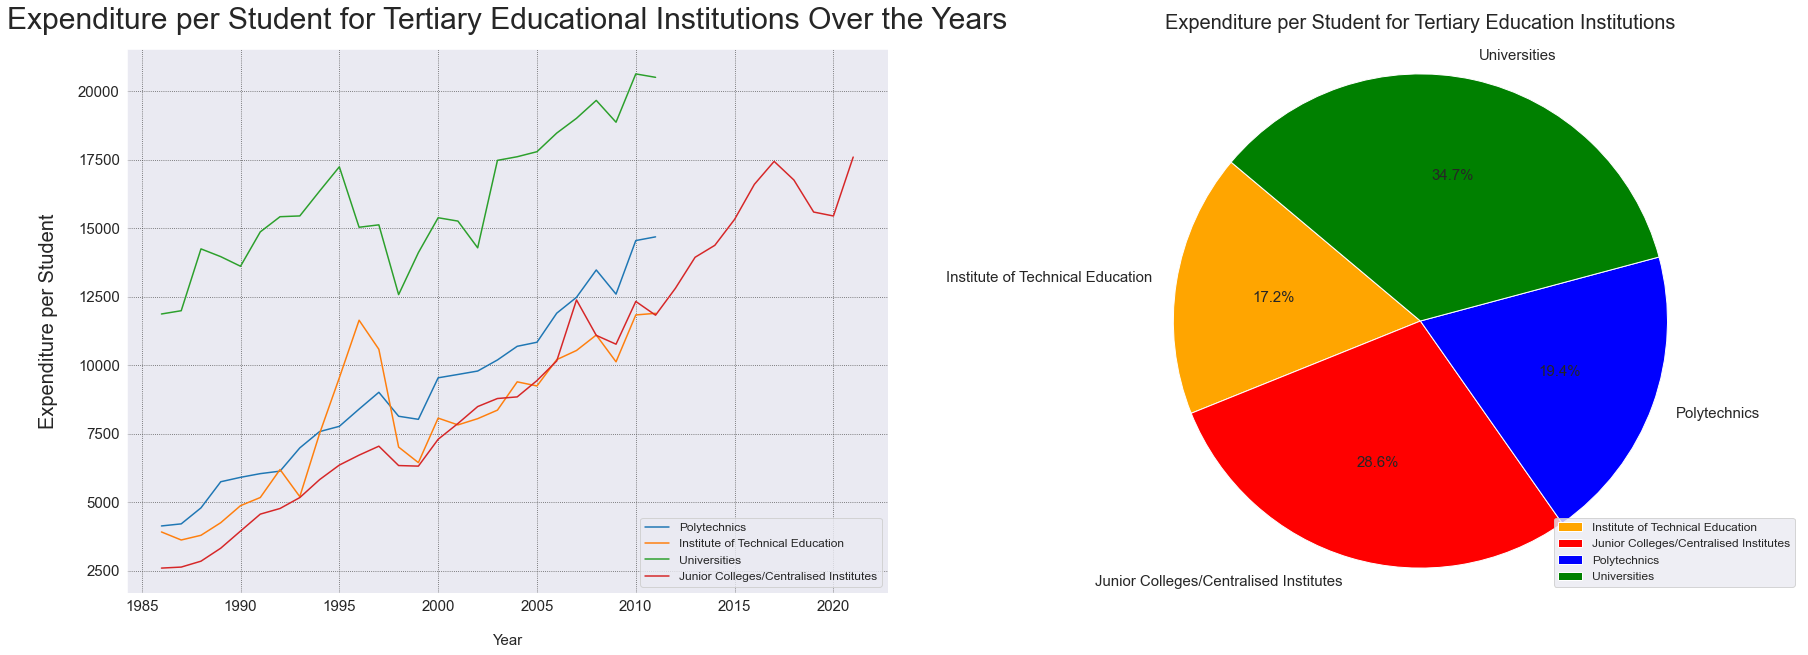

In [42]:
tertiary = ['Polytechnics', 'Institute of Technical Education', 'Universities', 'Junior Colleges/Centralised Institutes']
grouped_by_tertiary = government_expenditure[government_expenditure.type_of_educational_institution.isin(tertiary)]

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
for institution in tertiary:
    institution_data = grouped_by_tertiary[grouped_by_tertiary.type_of_educational_institution == institution]
    plt.plot(institution_data.year, institution_data.expenditure_per_student, label=institution)
plt.xlabel('Year',fontsize=15,labelpad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Expenditure per Student',fontsize=20,labelpad=20)
plt.title('Expenditure per Student for Tertiary Educational Institutions Over the Years',fontsize=30,pad=20)
plt.legend(loc='lower right', fontsize=12)


pie_data = grouped_by_tertiary.groupby('type_of_educational_institution')['expenditure_per_student'].sum()
plt.subplot(1, 2, 2)
colors = ['orange', 'red', 'blue', 'green']
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 15})
plt.title('Expenditure per Student for Tertiary Education Institutions',fontsize=20,pad=20)
plt.axis('equal')  

plt.legend(loc='lower right', fontsize=12)
plt.show()


This line graph depicts the financial investment made by the Singaporean government in each student across various tertiary institutions over the years. The graph encompasses four lines representing Polytechnics, ITE, local universities, and JCs. By analyzing this data, we can discern the trends in government spending on education, along with potential factors influencing these patterns.

The graph clearly illustrates a positive trend in the amount of money the government allocates to each student in recent years. This surge in financial support can be attributed to several factors, including the rising costs of education and the government's commitment to enhancing the overall quality of education in Singapore. By investing more in the education sector, the government aims to equip its students with the necessary skills and knowledge to meet the challenges of a rapidly evolving global economy.

Notably, the graph reveals that the government dedicates more financial resources to students in polytechnics and ITEs than those in universities. This differential funding can be attributed to the distinct roles these institutions play in the Singaporean economy.

Polytechnics and ITEs are renowned for providing more vocational and skills-based training, which is highly valued in the local job market. As a result, the government perceives these institutions as crucial contributors to Singapore's economic growth and workforce development, leading to higher per-student funding in these areas.

On the other hand, local universities receive substantial financial support as well, especially for research-based postgraduate programs. As reported by The Strait Times (source: <a src="https://www.straitstimes.com/singapore/parenting-education/most-research-based-master-s-degrees-subsidised-by-moe">Source</a>), the Ministry of Education (MOE) subsidizes most research-based master's degrees to foster a broad base of research manpower for the nation. Additionally, funding may be provided for specific postgraduate qualifications in fields like public administration, public health, and architecture, further enhancing the country's expertise in these critical areas.

The Singaporean government also demonstrates its commitment to ensuring equitable access to quality education, regardless of a student's financial circumstances. By raising the income eligibility cap for financial assistance scheme (FAS) students, the government aims to alleviate the financial burden on families and expand access to education for more students (source: <a src="https://www.straitstimes.com/singapore/parenting-education/about-10500-more-students-to-benefit-from-financial-support-bringing-total-to-135500">Source</a>). This move aligns with the government's vision of nurturing a well-educated and skilled populace, capable of contributing to the nation's prosperity.

In conclusion, the line graph effectively showcases the Singaporean government's dedication to investing in its students' education. The increasing financial support over the years reflects the government's efforts to adapt to changing educational needs and prioritize vocational training at polytechnics and ITEs. Additionally, the emphasis on funding research-based programs at universities emphasizes Singapore's commitment to building expertise in crucial fields. With the ongoing initiatives to ensure equitable access to quality education, the government endeavors to build a knowledgeable and skilled workforce, driving Singapore's growth and prosperity in the future.


### Takeaways from the government expenditure on education per student dataset

<li>The line graph illustrates a positive trend in the Singaporean government's financial investment per student across tertiary institutions over the years.</li>
<li>Rising education costs and the government's commitment to enhancing educational quality are potential factors driving the increased funding for each student.</li>
<li>Polytechnics and ITEs receive higher per-student funding due to their significant role in providing vocational and skills-based training, essential for the local job market and economic growth.</li>
<li>Local universities also receive substantial financial support, particularly for research-based postgraduate programs, strengthening Singapore's expertise in various critical fields.</li>
<li>The government demonstrates a commitment to equitable access to education by raising income eligibility caps for the financial assistance scheme, aiming to alleviate financial burdens and expand educational access for more students.</li>
<li>The increasing financial support reflects the government's efforts to adapt to evolving educational needs and nurture a knowledgeable and skilled workforce to contribute to Singapore's future prosperity.</li>

## Which Singaporean local university offers the highest average monthly salary? How has this salary trend evolved over time for that particular university?

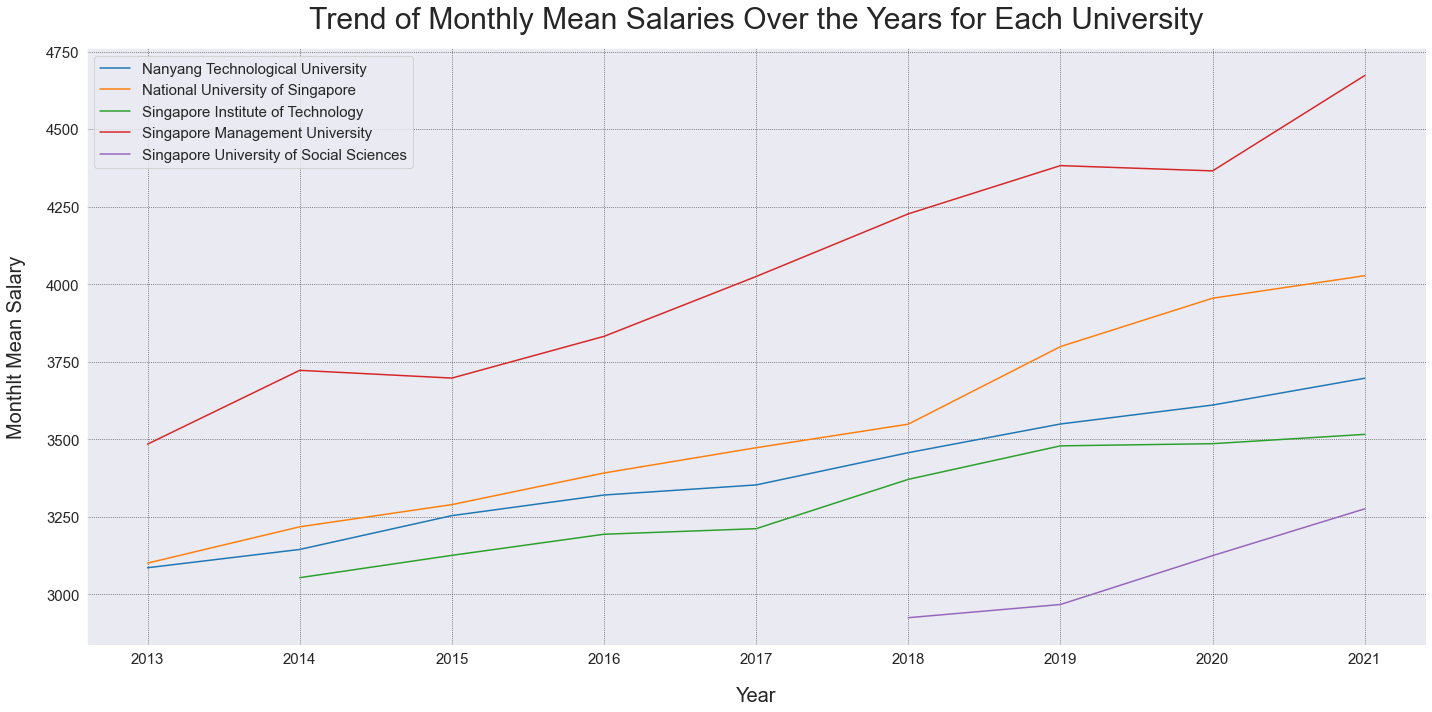

In [43]:
filtered_data = graduate_employment_survey[["year", "university", "basic_monthly_mean"]].copy()
filtered_data["year"] = pd.to_numeric(filtered_data["year"], errors="coerce")

grouped_data = filtered_data.groupby(["university", "year"])["basic_monthly_mean"].median().reset_index()

plt.figure(figsize=(20, 10))

universities = grouped_data["university"].unique()
for university in universities:
    data_by_university = grouped_data[grouped_data["university"] == university]
    plt.plot(data_by_university.year, data_by_university.basic_monthly_mean, label=university)

plt.xlabel('Year',fontsize=20,labelpad=20)
plt.xticks(fontsize=15)
plt.ylabel('Monthlt Mean Salary',fontsize=20,labelpad=20)
plt.yticks(fontsize=15)
plt.title('Trend of Monthly Mean Salaries Over the Years for Each University',fontsize=30,pad=20)
plt.legend(prop={'size': 15})

plt.tight_layout()
plt.show()

The graph shows the mean salary for each local university in Singapore over the years. The x-axis shows the years, and the y-axis shows the mean salary in Singapore dollars (SGD). There are 5 local universities which are represented in this line graph. Red for Singapore Management University (SMU), yellow for National University of Singapore (NUS), blue for Nanyang Technological University (NTU), green for Singapore Institute of Technology (SIT) and purple Singapore University of Social Sciences (SUSS).

The graph shows that the mean salary for graduates from all universities has increased over the years. This is likely due to a number of factors, including the increasing demand for skilled workers in Singapore and the rising cost of living. The graph shows that in graduates from SMU have had the highest monthly mean salaries over time. In 2021, an SMU graduate's monthly mean salary was close to 4750SGD. NUS is second, with a monthly mean salary of around 4000SGD, 750SGD lower than SMU. According to The Strait Times, SMU is known for its cutting-edge interactive pedagogy and interdisciplinary curriculum that equips students with skills and experiences, along with a focus on real world issues. As a result, SMU graduates are highly sought after by top employers. <a src="https://www.straitstimes.com/singapore/parenting-education/smu-hired-faster-higher-wages-university-graduates">Source</a>

The lowest earning graduates are from SUSS. As SUSS was founded in 2005, it is still relatively young compared to other universities in Singapore. This means that SUSS does not have the same level of name recognition as some of the older universities, and it may not be as well-connected to employers. SUSS's programs are more focused on applied learning. SUSS's programs are designed to prepare students for specific jobs in the workforce. This means that SUSS graduates may not have the same level of theoretical knowledge as graduates from other universities, and they may not be as well-prepared for research-intensive careers. SUSS graduates tend to work in lower-paying industries. SUSS graduates are more likely to work in industries such as social work, healthcare, and education. These industries are typically lower-paying than industries such as finance, banking, and technology.

The actual salary that a graduate will earn will depend on a number of factors, including their skills, experience, and the industry they work in.

## Which specific school within Singapore Management University (SMU) boasts the highest average salary? How does the salary differ between the Regular program and the Cum Laude program offered by that school?

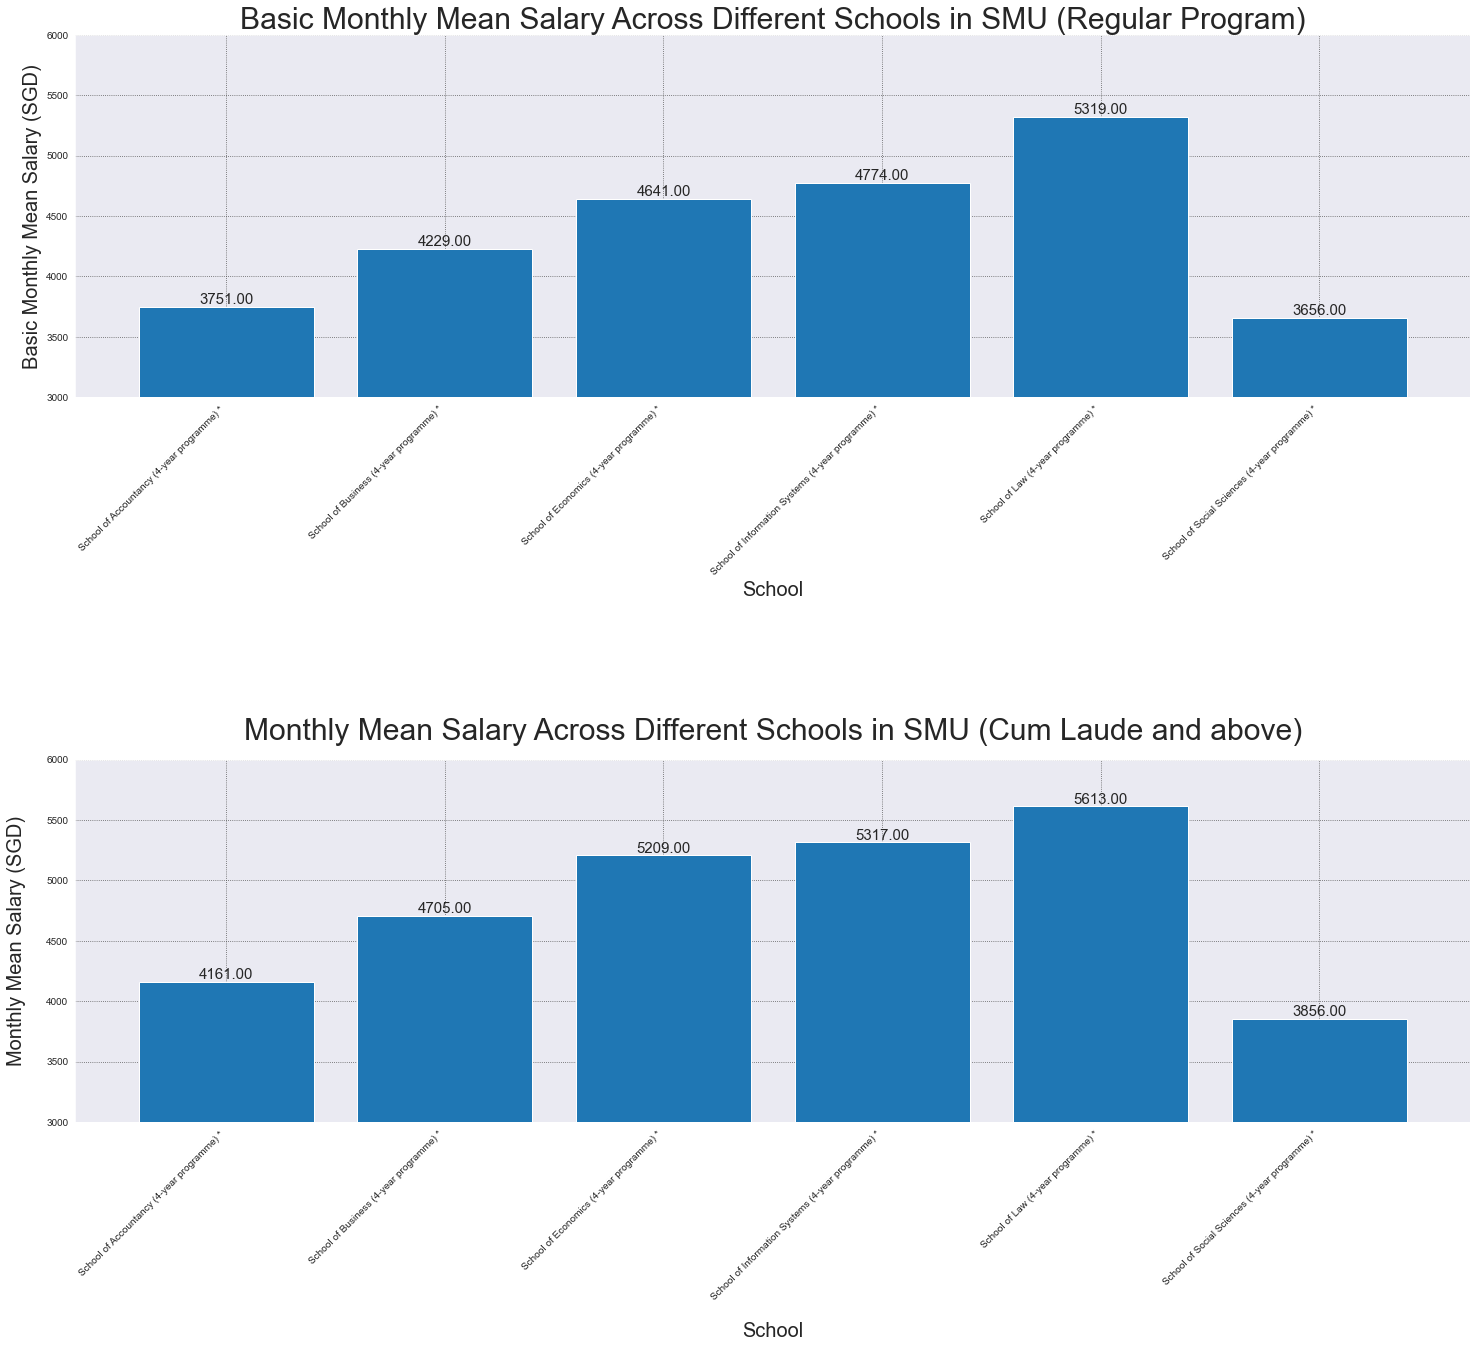

In [44]:
smu_filtered = graduate_employment_survey[graduate_employment_survey.university == 'Singapore Management University']
smu_filtered = smu_filtered[smu_filtered.year == 2021]

without_cum = smu_filtered[~smu_filtered.degree.str.contains(' Cum Laude and above', na=False)]
without_cum = without_cum[~without_cum.degree.str.contains(r' \(Cum Laude and above\)', na=False)]

mean_salary_regular = without_cum.groupby('school').basic_monthly_mean.mean().reset_index()

with_cum = smu_filtered[smu_filtered.degree.str.contains(r' \(Cum Laude and above\)', na=False)]
mean_salary_cum = with_cum.groupby('school').basic_monthly_mean.mean().reset_index()

plt.figure(figsize=(25, 20))

plt.subplot(2, 1, 1)
plt.ylim(3000, 6000)
bars = plt.bar(mean_salary_regular.school, mean_salary_regular.basic_monthly_mean)
plt.xlabel('School', fontsize=20)
plt.ylabel('Basic Monthly Mean Salary (SGD)', fontsize=20)
plt.title('Basic Monthly Mean Salary Across Different Schools in SMU (Regular Program)', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=15)

plt.subplot(2, 1, 2)
plt.ylim(3000, 6000)
bars = plt.bar(mean_salary_cum.school, mean_salary_cum.basic_monthly_mean)
plt.xlabel('School', fontsize=20, labelpad=20)
plt.ylabel('Monthly Mean Salary (SGD)', fontsize=20, labelpad=20)
plt.title('Monthly Mean Salary Across Different Schools in SMU (Cum Laude and above)', fontsize=30, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=15)

plt.subplots_adjust(hspace=1)
plt.show()

The bar chart presents the average monthly salaries of graduates from different schools at Singapore Management University (SMU), comparing the regular program with the Cum Laude program. Cum Laude is an academic distinction awarded to high-achieving students, often signifying "with honors."

Notably, Cum Laude graduates earn considerably more than their regular program counterparts. This can be attributed to their exceptional academic performance, which indicates dedication, discipline, and competence, making them more appealing to employers and potentially leading to better job opportunities and higher salaries. Moreover, their deeper understanding of their field may drive greater productivity and innovation, further contributing to their higher earnings.

Focusing on the School of Law and the School of Information Systems, graduates from these schools achieve the highest earnings. For the regular program, the mean salary is 5319SGD for School of Law and 4774SGD for School of Information Systems. In the Cum Laude program, the mean salary increases to 5613SGD for School of Law and 5317SGD for School of Information Systems.

Conversely, the School of Social Sciences offers the lowest mean salaries, at 3656SGD for the regular program and 3856SGD for the Cum Laude program. Singapore's STEM-focused job market and high demand for graduates in fields like engineering, computer science, and finance contribute to fewer job opportunities and intense competition for social sciences graduates. Employers prioritize technical skills like coding, data analysis, and problem-solving, making social sciences skills, such as critical thinking and research, less in-demand.

## What is the trend in the number of students enrolled, intake, and graduates for the Law and Information Technology courses over the years?

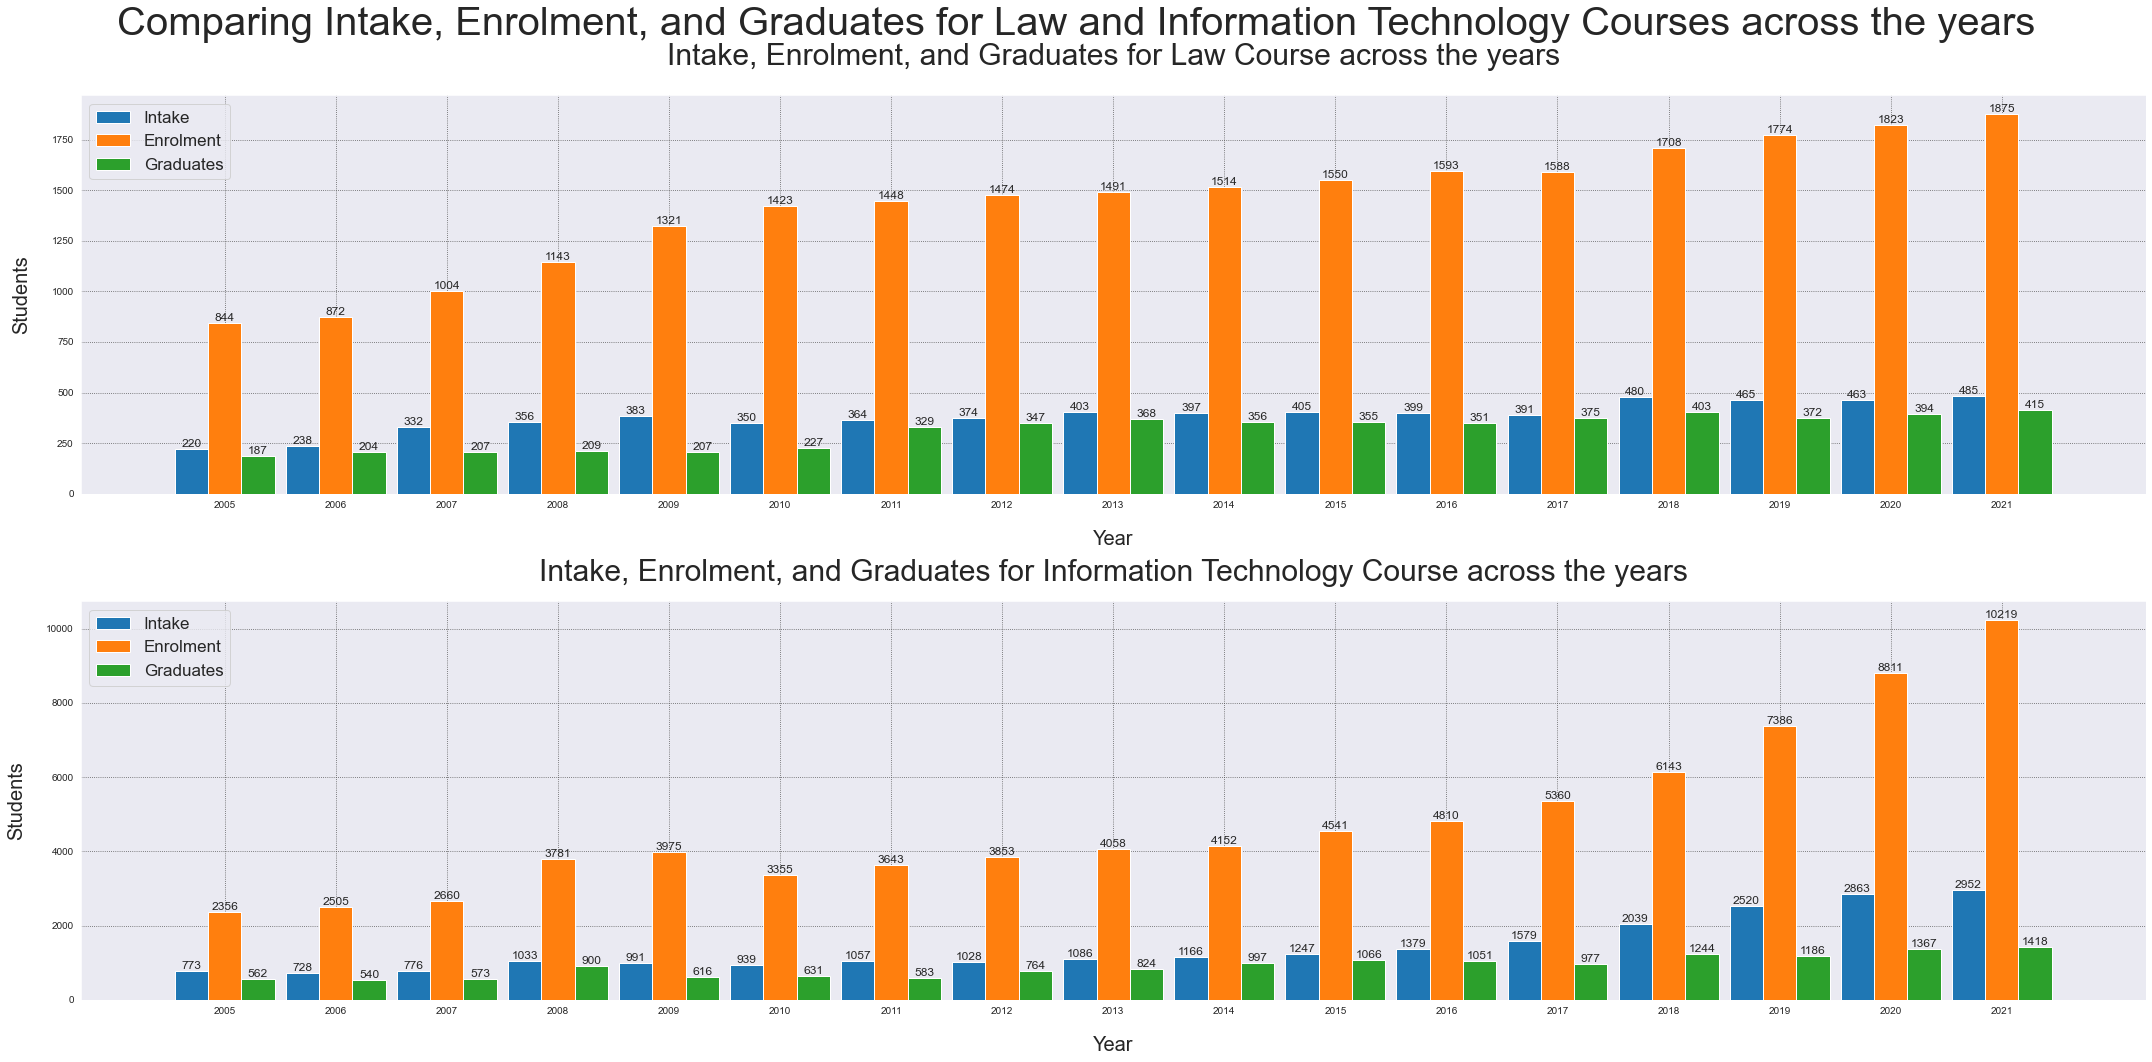

In [45]:
law_subset = uni_intake[uni_intake.course == 'Law']

plt.figure(figsize=(30, 15))
plt.suptitle('Comparing Intake, Enrolment, and Graduates for Law and Information Technology Courses across the years',fontsize=40)
width = 0.3
index = law_subset.year.unique()

plt.subplot(2,1,1)
plt.bar(index - width, law_subset.intake, width, label='Intake')
plt.bar(index, law_subset.enrolment, width, label='Enrolment')
plt.bar(index + width, law_subset.graduates, width, label='Graduates')

for i, v in enumerate(law_subset.intake):
    plt.text(index[i] - width, v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(law_subset.enrolment):
    plt.text(index[i], v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(law_subset.graduates):
    plt.text(index[i] + width, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Year',fontsize=20,labelpad=20)
plt.ylabel('Students',fontsize=20,labelpad=20)
plt.title('Intake, Enrolment, and Graduates for Law Course across the years',fontsize=30,pad=30)
plt.xticks(index, law_subset.year)
plt.legend(fontsize=17)

it_subset = uni_intake[uni_intake.course == 'Information Technology']

index = it_subset.year.unique()

plt.subplot(2,1,2)
plt.bar(index - width, it_subset.intake, width, label='Intake')
plt.bar(index, it_subset.enrolment, width, label='Enrolment')
plt.bar(index + width, it_subset.graduates, width, label='Graduates')

for i, v in enumerate(it_subset.intake):
    plt.text(index[i] - width, v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(it_subset.enrolment):
    plt.text(index[i], v, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(it_subset.graduates):
    plt.text(index[i] + width, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xlabel('Year',fontsize=20,labelpad=20)
plt.ylabel('Students',fontsize=20,labelpad=20)
plt.title('Intake, Enrolment, and Graduates for Information Technology Course across the years',fontsize=30,pad=20)
plt.xticks(index, it_subset.year)
plt.legend(fontsize=17)

plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()

In this data analysis, we examined the trends in intakes, enrolments and graduates for Information Technology (IT) and Law courses in Singapore over the years. The grouped bar chart indicates that both IT and Law courses have seen increases in popularity, though the growth rate for IT has been more significant.

The data shows a rapid increase in IT enrolments since 2016, with the number of students applying for IT courses rising to 10219 in 2021, representing a substantial increase of around 6000 students compared to 2015. The surge in demand for IT professionals can be attributed to the increasing reliance on technology across various industries. Technological advancements and innovations in Singapore have opened up new opportunities and specialized areas within the IT field, attracting more students interested in staying updated with the latest trends. Additionally, the competitive salaries and job stability associated with IT careers have further incentivized students to pursue IT-related courses. The expansion of IT infrastructure in Singapore has also created a demand for skilled professionals capable of designing, implementing, and maintaining these systems, adding to the reasons for the rising demand for IT degrees.(<a src="https://www.businesstimes.com.sg/singapore/economy-policy/strong-demand-tech-talent-singapore-despite-global-big-tech-layoffs">Source</a>) (<a src="https://www.iss.nus.edu.sg/community/newsroom/news-detail/2019/08/26/demand-for-tech-jobs-in-singapore-grew-20-over-last-year-report">Source</a>).

On the other hand, Law courses have experienced steady growth in enrolments, but not at the same rapid pace as IT. The number of enrolments for Law courses reached 1,875 in 2021, representing an increase of 200 enrolments since 2015. The perception of Law degrees as challenging and demanding may deter some potential students from pursuing this field. Moreover, structural changes to the professional training and admission regime for lawyers in Singapore, introduced by the Ministry of Law in 2018, may have contributed to controlling the supply of lawyers and preventing an oversaturation in the legal job market. (<a src="https://www.channelnewsasia.com/singapore/they-are-literally-raising-bar-changes-singapore-bar-exams-draw-mixed-feelings-806981">Source</a>)

In conclusion, the data suggests that the popularity of both IT and Law courses has increased over the years in Singapore, with IT experiencing a more rapid growth rate. The factors contributing to the rise in IT enrolments include the increasing demand for IT professionals, technological advancements, attractive career prospects, and the expansion of IT infrastructure. Meanwhile, Law enrolments have grown steadily, and the introduction of new regulatory measures aimed at maintaining the balance between the supply of lawyers and the demand for legal services may have impacted the rate of growth in this field.

## What are the disparities in employment rates and average monthly salaries between the Law and Information Systems courses at Singapore Management University (SMU)?

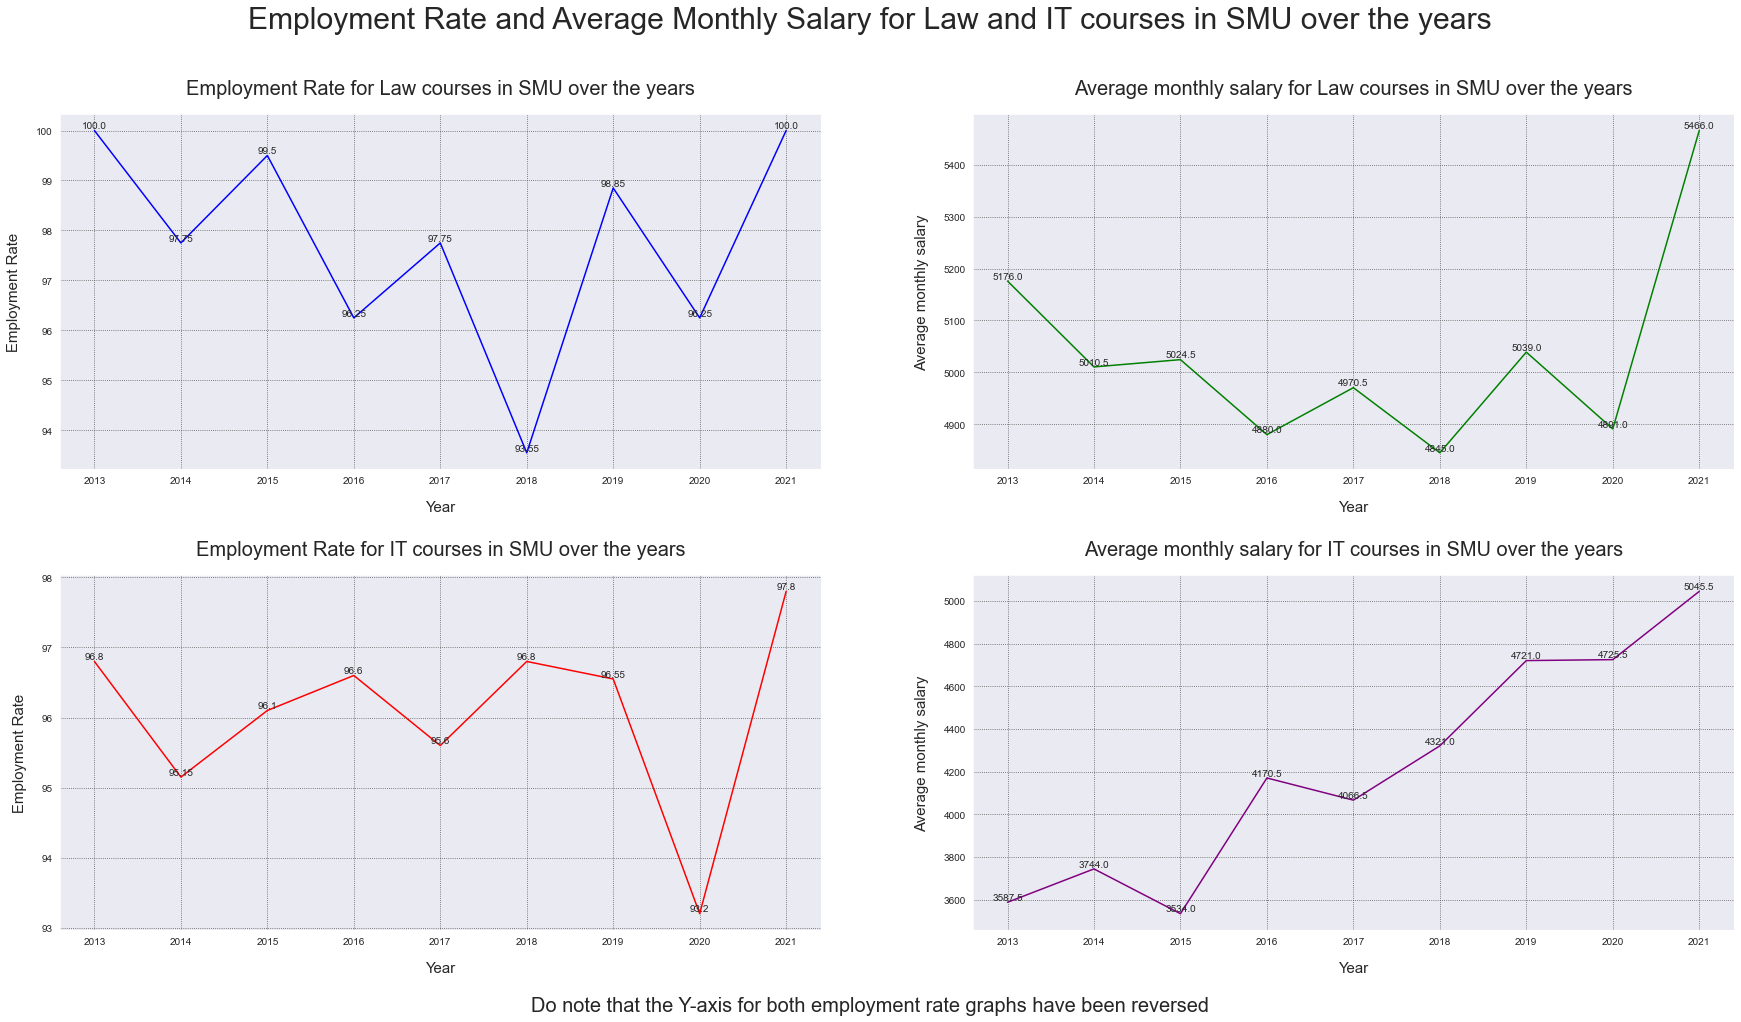

In [46]:
smu_filtered = graduate_employment_survey[graduate_employment_survey.university =='Singapore Management University']
smu_filtered_law = smu_filtered[smu_filtered.school.str.contains('Law')]

# Combining the rows regardless of the Cum Ladue and above status for Law courses in SMU
df = []

for year in smu_filtered_law.year.unique():

    year_rows = smu_filtered_law[smu_filtered_law['year'] == year].copy()

    year_rows['basic_monthly_mean'] = pd.to_numeric(year_rows['basic_monthly_mean'])
    year_rows['employment_rate_overall'] = pd.to_numeric(year_rows['employment_rate_overall'])

    bmm = year_rows['basic_monthly_mean'].mean()
    er = year_rows['employment_rate_overall'].mean()

    school = year_rows.iloc[0]['school']
    degree = year_rows.iloc[0]['degree']
    university = year_rows.iloc[0]['university']

    row_df = pd.DataFrame({
        'year': year,
        'university': university,
        'school': school,
        'degree': degree,
        'basic_monthly_mean': bmm,
        'employment_rate': er
    }, index=[0])

    df.append(row_df)

smu_law = pd.concat(df, ignore_index=True)

# Combining the rows regardless of the Cum Ladue and above status for IT courses in SMU
smu_filtered_it = smu_filtered[smu_filtered.school.str.contains('Information Systems')]

empty_df = []

for year in smu_filtered_it.year.unique():

    year_rows = smu_filtered_it[smu_filtered_it['year'] == year].copy()

    year_rows['basic_monthly_mean'] = pd.to_numeric(year_rows['basic_monthly_mean'])
    year_rows['employment_rate_overall'] = pd.to_numeric(year_rows['employment_rate_overall'])

    bmm = year_rows['basic_monthly_mean'].mean()
    er = year_rows['employment_rate_overall'].mean()

    school = year_rows.iloc[0]['school']
    degree = year_rows.iloc[0]['degree']
    university = year_rows.iloc[0]['university']

    new_df = pd.DataFrame({
        'year': year,
        'university': university,
        'school': school,
        'degree': degree,
        'basic_monthly_mean': bmm,
        'employment_rate': er
    }, index=[0])

    empty_df.append(new_df)

smu_it = pd.concat(empty_df, ignore_index=True)

plt.figure(figsize=(30, 15))
plt.suptitle('Employment Rate and Average Monthly Salary for Law and IT courses in SMU over the years', fontsize=30)

plt.subplot(2, 2, 1)
plt.title('Employment Rate for Law courses in SMU over the years', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('Employment Rate', fontsize=15, labelpad=15)
plt.plot(smu_law.year, smu_law.employment_rate, color='blue')

for i, rate in enumerate(smu_law.employment_rate):
    plt.text(smu_law.year[i], rate, str(round(rate, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 2)
plt.title('Average monthly salary for Law courses in SMU over the years', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('Average monthly salary', fontsize=15, labelpad=15)
plt.plot(smu_law.year, smu_law.basic_monthly_mean, color='green')

for i, salary in enumerate(smu_law.basic_monthly_mean):
    plt.text(smu_law.year[i], salary, str(round(salary, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 3)
plt.title('Employment Rate for IT courses in SMU over the years', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('Employment Rate', fontsize=15, labelpad=15)
plt.plot(smu_it.year, smu_it.employment_rate, color='red')

for i, rate in enumerate(smu_it.employment_rate):
    plt.text(smu_it.year[i], rate, str(round(rate, 2)), ha='center', va='bottom')

plt.subplot(2, 2, 4)
plt.title('Average monthly salary for IT courses in SMU over the years', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15, labelpad=15)
plt.ylabel('Average monthly salary', fontsize=15, labelpad=15)
plt.plot(smu_it.year, smu_it.basic_monthly_mean, color='purple')
plt.figtext(0.5, 0.05, "Do note that the Y-axis for both employment rate graphs have been reversed", fontsize=20, ha='center')

for i, salary in enumerate(smu_it.basic_monthly_mean):
    plt.text(smu_it.year[i], salary, str(round(salary, 2)), ha='center', va='bottom')

plt.subplots_adjust(hspace=0.3)
plt.show()


<strong>Comparing Employment Rate and Average Monthly Salary for Law and Information Technology (IT) Courses at SMU</strong>

<strong>Law</strong>

<ins>Employment Rate</ins><br>
The employment rate for Law courses at SMU has consistently remained robust, fluctuating between an impressive range of 93.55% to 100% over the years. However, in 2018, there was a notable dip in the employment rate, falling to 93.55% from its previous mark of 97.75% in 2017. An insightful report from ASEAN Today indicates that this decline can be attributed to a growing number of Singaporean students pursuing Law degrees overseas, leading to an influx of Law graduates in the local market and resulting in a challenge commonly known as "brain drain" in the Law sector. <a src="https://www.aseantoday.com/2016/09/too-many-lawyers-not-enough-jobs-singapores-enforced-brain-drain/">Source</a>

<ins>Average Monthly Salary</ins><br>
The average monthly salary for Law graduates at SMU has displayed fluctuations over time, ranging from 5176SGD to 5466SGD. Notably, there was a decline observed from 2013 to 2018, with the salary dropping from 5176SGD to 4845SGD. However, the trend reversed in 2020 and 2021, witnessing a significant upswing in the average monthly salary, soaring to 5466SGD from 4891SGD. According to a report by The Strait Times, this surge can be attributed to several factors, including the rise in Law firms established by young lawyers amidst the Covid-19 pandemic and a consequent increase in demand for legal services, leading to a positive impact on remuneration levels. <a src="https://www.straitstimes.com/singapore/courts-crime/more-law-firms-set-up-in-spore-amid-pandemic">Source</a>

<strong>Information Technology (IT)</strong>

<ins>Employment Rate</ins><br>
The employment rate for IT courses at SMU has demonstrated overall stability, with figures ranging from 96.8% to 97.8%. However, a notable decline was observed in 2020 when the employment rate dropped to 93.2% from 96.55% in 2021. This decrease is attributed to the adverse impact of the Covid-19 pandemic, which affected not only the IT sector but several industries as well. As reported by The Strait Times, over 113,500 jobs were lost in 2020 due to weak demand and supply chain disruptions, leading to a temporary downturn in the employment rate. <a src="https://sg.finance.yahoo.com/news/job-outlook-2021-tech-related-040135810.html?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJwj92dyP0fGHbfPENk5GsbhinC0McOI-48okvAtKWV4HAgYPM42pjdwOlZH0vc16ir47CD5PPRM5Zdq9xwaE6pa0TprOnGKIeqJt5X9FGBUBGUr1pi1mqM5ejGkT5p6QIOu-EVzuB8dAAqmrv_hRSrga-9m2kBwaSR6diNEeCQH">Source</a>

<ins>Average Monthly Salary</ins><br>
The average monthly salary for IT professionals at SMU has experienced steady growth over the years, showcasing a remarkable rise from 3587SGD to 5045.5SGD in 2021—an impressive increase of nearly 1500SGD in less than a decade. As highlighted in a comprehensive report by The Strait Times, the surge in salary can be attributed to the rapid advancement of technology, with major companies seeking to attract top-tier talent, which in turn has positively impacted remuneration standards in the IT industry. The median base salaries for various IT positions, such as junior engineers, senior engineers, and engineering managers, further validate the upward trend, reflecting the industry's eagerness to reward valuable expertise. <a src="https://www.straitstimes.com/business/software-engineers-in-s-pore-made-record-salaries-last-year-demand-for-ai-skills-to-rise-in-tech-sector">Source</a>

<strong>Conclusion</strong><br>
The analysis reveals notable disparities in employment rates and average monthly salaries between Law and Information Technology (IT) courses at Singapore Management University (SMU). While the employment rate for Law courses exhibits relative stability, ranging from 93.55% to 100%, the IT courses show a more consistent range of 96.8% to 97.8%. The Covid-19 pandemic had a discernible impact on both fields, leading to temporary declines in employment rates in 2018 and 2020 for Law and IT courses, respectively. In terms of average monthly salaries, Law graduates experienced fluctuations, with a drop from 5176SGD to 4845SGD, but rebounded with a significant increase to 5466SGD in 2021. On the other hand, IT graduates witnessed steady growth in their average monthly salary, rising from 3587SGD to an impressive 5045.5SGD in 2021. These findings indicate distinct trends in employment and remuneration patterns between the two disciplines at SMU.

## How do the basic monthly salaries for law graduates from NUS and SMU compare?

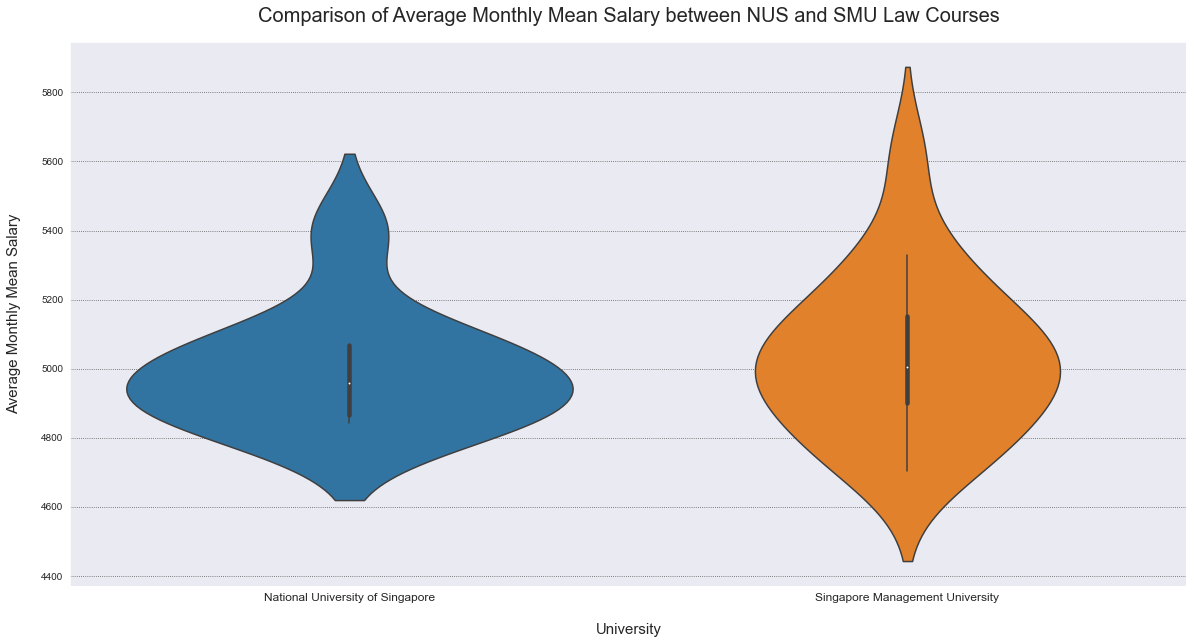

In [47]:
law_course = graduate_employment_survey[graduate_employment_survey.degree.str.contains('Law')]

nus_law = law_course[law_course.university == 'National University of Singapore'].copy()
smu_law = law_course[law_course.university == 'Singapore Management University'].copy()

nus_law["University"] = "National University of Singapore"
smu_law["University"] = "Singapore Management University"

nus_law['basic_monthly_mean'] = pd.to_numeric(nus_law['basic_monthly_mean'])
smu_law['basic_monthly_mean'] = pd.to_numeric(smu_law['basic_monthly_mean'])

law_data = pd.concat([nus_law, smu_law])

plt.figure(figsize=(20, 10))
sns.violinplot(x="University", y="basic_monthly_mean", data=law_data)
plt.xlabel('University', fontsize=15,labelpad=20)
plt.ylabel('Average Monthly Mean Salary', fontsize=15,labelpad=20)
plt.title('Comparison of Average Monthly Mean Salary between NUS and SMU Law Courses', fontsize=20,pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()


The graph shows the distribution of basic monthly salaries for law graduates from NUS and SMU. The blue bars represent NUS graduates, and the orange bars represent SMU graduates. The taller the bar, the more graduates received that salary.

The graph shows that the median basic monthly salary for NUS graduates is slightly higher than for SMU graduates. The average salary for NUS graduates is also slightly higher. However, there is a wider range of salaries for NUS graduates, with some graduates earning significantly more than the median salary.

The graph also shows that there are more SMU graduates with lower basic monthly salaries than NUS graduates. This suggests that SMU may be more accessible to students from lower-income backgrounds. There are a small number of law graduates from both universities who earn more than S$8,000 per month. The distribution of salaries for SMU graduates is more skewed to the left, meaning that there are more SMU graduates with lower salaries.

Overall, the graph shows that there is a slight difference in basic monthly salaries for law graduates from NUS and SMU. However, the difference is not significant, and both universities offer graduates good career prospects.


### Takeaways for the graduate employment survery and universities intake and enrolment dataset


<ul >
    <li>Overall, the mean salary for graduates from all universities has increased, reflecting the rising demand for skilled workers and the growing cost of living in Singapore.</li><br>
    <li>Singapore Management University (SMU) consistently recorded the highest mean salaries for graduates over time, attributing its success to its cutting-edge interactive pedagogy and interdisciplinary curriculum, making its graduates highly sought after by top employers.</li><br>
    <li>On the other hand, Singapore University of Social Sciences (SUSS) has the lowest earning graduates due to its focus on applied learning and graduates often pursuing careers in lower-paying industries like social work, healthcare, and education.</li><br>
    <li>Among different schools at SMU, graduates from the School of Law and the School of Information Systems achieve the highest earnings, while the School of Social Sciences offers the lowest mean salaries, with social sciences skills being less in-demand compared to technical skills in the job market.</li><br>
    <li>The analysis of the distribution of basic monthly salaries for law graduates from NUS and SMU indicates that NUS graduates have slightly higher median and average salaries, but there is a wider range of salaries, with some graduates earning significantly more.</li><br>
    <li>SMU graduates show a more skewed distribution of salaries to the left, suggesting that SMU may be more accessible to students from lower-income backgrounds.
    Both NUS and SMU offer graduates good career prospects, with the difference in salaries not being significant.</li><br>
    <li>The graph comparing employment rate and average monthly salary for Law and Information Technology (IT) courses at SMU indicates that Cum Laude graduates generally earn higher salaries due to their exceptional academic performance and deeper understanding of their field.</li><br>
    <li>The data analysis on the enrolments and graduates for IT and Law courses in Singapore shows a rapid increase in IT enrolments since 2016, while Law courses experienced steady growth but not as rapidly as IT.</li><br>
    <li>The demand for IT professionals is driven by technological advancements, attractive career prospects, and the expansion of IT infrastructure in Singapore.</li><br>
    <li>Factors like the perception of Law degrees as challenging and the introduction of structural changes to control the supply of lawyers in the legal job market may have impacted the growth rate for Law enrolments.</li><br>
    <li>Education plays a crucial role in career success, with universities like SMU providing cutting-edge education leading to higher earning potentials for graduates.</li><br>
    <li>Special academic achievements like Cum Laude can positively impact graduates' salaries and job prospects.</li><br>
    <li>Different schools and disciplines within universities may have varying employment and salary outcomes, with technical skills and expertise being highly valued in the job market.</li><br>
    <li>There is a positive overall trend in mean salaries for graduates from all universities, highlighting Singapore's growing demand for skilled workers and competitive job market.</li><br>
</ul>